# STAT 207 Project 02 - Handheld Console Wars: Analyzing Sales Sony PSP

Soobin Jang, Joonwoo Ha

Soobin Jang(soobinj2) & Joonwoo Ha(ha47) worked together on all parts of this project.

We both reviewed the full document before submission

## 1. Introduction

### Title

Handheld Console Wars: Analyzing Sales Sony PSP

### Dataset introduction

Our dataset, video_games.csv, contains the playtime and sales of over 1000 video games launched between 2004 and 2010. The playtime data was gathered from "How Long to Beat" crowdsource statistics.

### Populations and sample

Our data represent a sample of the video game market between 2004 and 2010. The population of interest contains all video games released globally on the Sony PSP between 2004 and 2010.

### Research question

Confidence Interval Analysis: What proportion of video games in this dataset are run in Sony PSP platform? What is a reasonable range of values for the proportion of Sony PSP games in this dataset?

Hypothesis Testing Analysis: Which game genres have the highest sales? Are action games and other genres much different in terms of US sales?

### Contextual importance

From our research, people especially those who are invloved in the industry of investment and game development. If Sony PSP games have a large proportion of the gaming market, it indicates a strong developer interest and vice versa. These insights can help other handheld gaming sush as Nintendo Swith and Valve Steamdeck decide to invest in the handgeld platform is worthwhile.

In [1]:
#Imports here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("video_games.csv", encoding = "unicode-escape")
df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,PlayStation 3,MotoGP 09/10,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,1,0,0,0,0,1
1766,PlayStation 3,Prison Break: The Conspiracy,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1767,Nintendo Wii,"Sakura Wars: So Long, My Love",0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1768,X360,Record of Agarest War (The Really Naughty Limi...,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,1,0,0,0


## 2. Confidence Interval Analytical Tasks

### Research Question

What proportion of video games in this dataset are run in Sony PSP platform? What is a reasonable range of values for the proportion of Sony PSP games in this dataset?

### Dataset Cleaning

In [4]:
df['Console'].isna().sum()

0

In [5]:
df['Console'].unique()

array(['Nintendo DS', 'Sony PSP', 'X360', 'Nintendo Wii', 'PlayStation 3'],
      dtype=object)

In [11]:
df['Is_Sony_PSP'] = df['Console'] == 'Sony PSP'
df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,Is_Sony_PSP
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,1,0,0,0,1,False
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,True
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,1,1,1,1,1,False
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,1,True
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,1,0,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,PlayStation 3,MotoGP 09/10,0.04,0,0,0,0,2010,0,0,...,0,0,0,1,0,0,0,0,1,False
1766,PlayStation 3,Prison Break: The Conspiracy,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,1,False
1767,Nintendo Wii,"Sakura Wars: So Long, My Love",0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,1,False
1768,X360,Record of Agarest War (The Really Naughty Limi...,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,1,0,0,0,False


In [12]:
proportion_psp = df['Is_Sony_PSP'].mean()
proportion_psp

0.17344632768361581

### Descriptive Analysis

In [8]:
df.shape

(1770, 166)

In [13]:
console_count = df['Console'].value_counts()
console_count

Console
X360             437
Nintendo DS      418
PlayStation 3    312
Sony PSP         307
Nintendo Wii     296
Name: count, dtype: int64

In [14]:
console_prop = df['Console'].value_counts(normalize=True) * 100
console_prop

Console
X360             24.689266
Nintendo DS      23.615819
PlayStation 3    17.627119
Sony PSP         17.344633
Nintendo Wii     16.723164
Name: proportion, dtype: float64

### Confidence Level

In [15]:
proportion_data = []

for i in range(5000):  
    random_sample = df.sample(500, replace=True)
    proportion_sony_psp = (random_sample['Console'] == 'Sony PSP').mean()
    proportion_data.append(proportion_sony_psp)
df_prop_sample = pd.DataFrame({"x": proportion_data})

df_prop_sample


,x
0,0.162
1,0.152
2,0.162
3,0.174
4,0.182
...,...
4995,0.184
4996,0.168
4997,0.210
4998,0.180


In [16]:
confidence_level = 0.95

a = 1 - confidence_level

lower_bound = np.percentile(df_prop_sample, a/2 * 100)

upper_bound = np.percentile(df_prop_sample, (1 - a/2) * 100)

lower_bound, upper_bound

(0.142, 0.208)

### Interpret Confidence interval & Confidence level

The 95% confidence interval (CI) for the proportion of Sony PSP games in the dataset is (0.142, 0.208), meaning we are 95% confident that the true proportion of Sony PSP games in the broader population falls within this range. This indicates that if we were to repeatedly draw random samples and compute confidence intervals, 95% of those intervals would contain the true population proportion. The confidence level of 95% reflects the reliability of this estimate, implying that there is still a 5% chance that this specific interval does not include the true proportion. This uncertainty arises because confidence intervals are based on sample data rather than the full population. The interval suggests that Sony PSP games make up approximately 14.2% to 20.8% of all handheld video games in the broader population. Since this confidence interval does not overlap with extremely high proportions, we can infer that Sony PSP games represent a moderate but not dominant share of handheld games. While confidence intervals provide a statistically sound estimate, they do not guarantee the exact proportion in the population but rather give a likely range based on the data.

## 3. Hypothesis Testing Analytical Tasks

### Research question

Which game genres have the highest sales? Are action games and other genres much different in terms of US sales?

### Dataset cleaning

In [17]:
sales_df = df[['Genre', 'US Sales (millions)']]

missing_val = sales_df.isna().sum()
missing_val

Genre                  0
US Sales (millions)    0
dtype: int64

In [18]:
sales_df_clean = sales_df.dropna()
sales_df_clean = sales_df_clean[sales_df_clean['US Sales (millions)'] > 0]

sales_df_clean

,Genre,US Sales (millions)
0,Action,4.69
1,Strategy,0.56
2,"Action, Racing / Driving, Sports",0.54
3,Sports,0.49
4,Action,0.45
...,...,...
1765,Racing / Driving,0.04
1766,Action,0.04
1767,"Adventure, Strategy",0.04
1768,"Role-Playing (RPG), Strategy",0.04


### Descriptive analytics

In [19]:
sales_mean = sales_df_clean['US Sales (millions)'].mean()
sales_mean

0.47978531073446323

In [20]:
sales_median = sales_df_clean['US Sales (millions)'].median()
sales_median

0.19

In [21]:
sales_std = sales_df_clean['US Sales (millions)'].std()
sales_std

1.0649147234595189

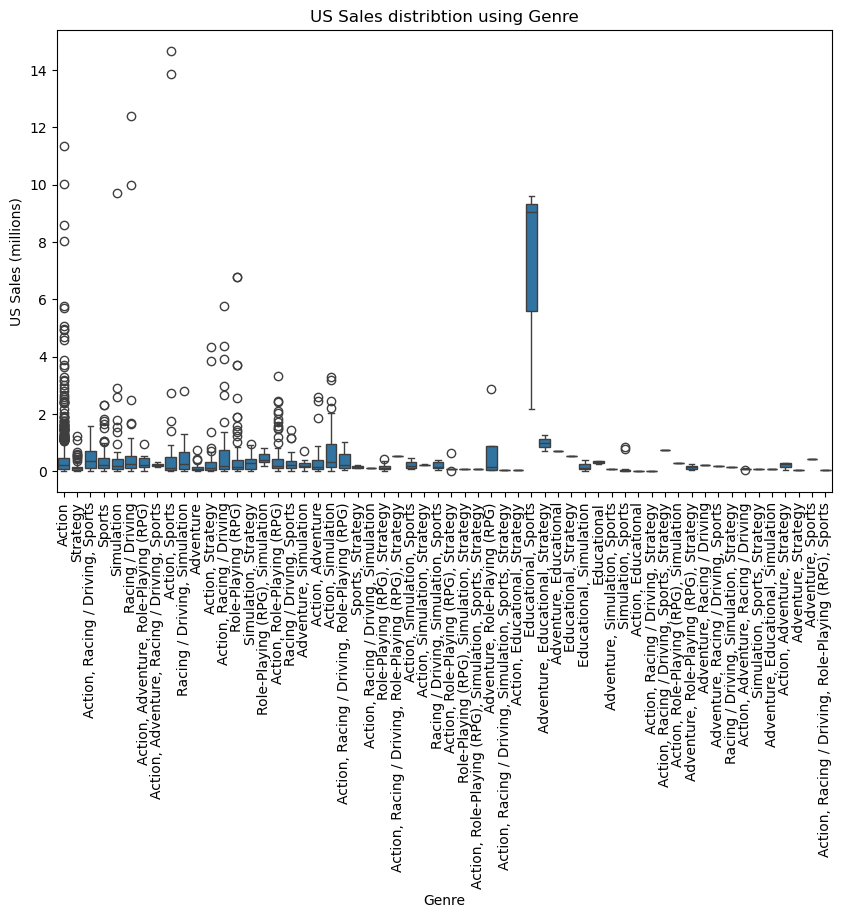

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='US Sales (millions)', data=sales_df_clean)
plt.title('US Sales distribtion using Genre')
plt.xticks(rotation=90)

plt.show()

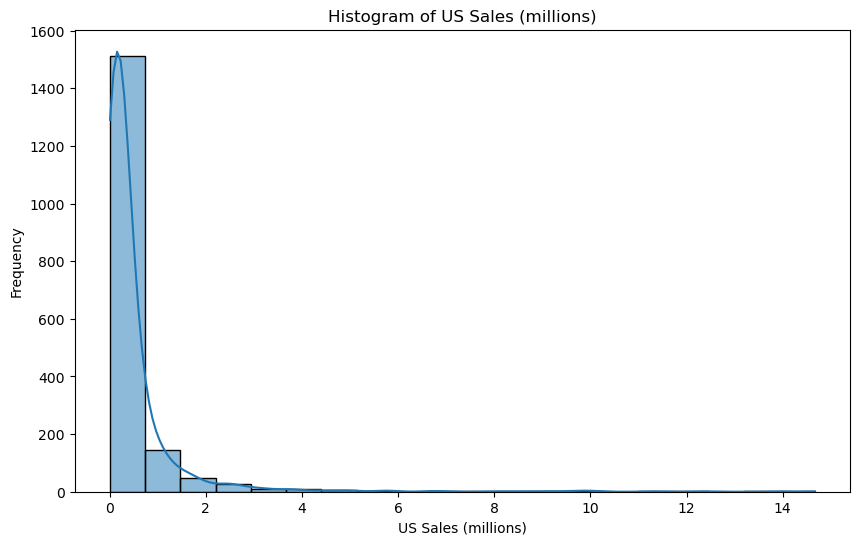

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_df_clean['US Sales (millions)'], bins=20, kde = True)
plt.title('Histogram of US Sales (millions)')
plt.xlabel('US Sales (millions)')
plt.ylabel('Frequency')

plt.show()

### Hypothesis Test

This analysis aims to investigate whether the median US sales of Nintendo DS games differ from the median US sales of Sony PSP games.

Null Hypothesis (H0): The median US sales of Nintendo DS games are equal to the median US sales of Sony PSP games.
Alternative Hypothesis (H1): The median US sales of Nintendo DS games are different from the median US sales of Sony PSP games.

By testing this hypothesis, we seek to determine whether console type significantly impacts the commercial success of a game in the US market. The focus on these two platforms is due to their prominence in the handheld gaming industry during their time.



### Significance Level

Our significance level of this test is 0.05.

### Conditions

The test must compare the same population parameter, which in this case is the median US sales of Nintendo DS and Sony PSP games. The null hypothesis should assume no difference, while the alternative hypothesis should suggest a difference in medians. Observations must be independent, meaning that each game’s sales figures should not influence another game’s sales.
The sample should be randomly selected and representative of the population, which is reasonably satisfied as the dataset includes a diverse collection of video games from both consoles.
By meeting these conditions, we can confidently conduct the hypothesis test to examine whether there is a significant difference in sales performance between Nintendo DS and Sony PSP games.

In [28]:
df_action = sales_df_clean[sales_df_clean["Genre"] == "Action"]

df_others = sales_df_clean[sales_df_clean["Genre"] != "Action"]

In [29]:
df_difference = df_action["US Sales (millions)"].median() - df_others["US Sales (millions)"].median()

df_difference

0.04000000000000001

In [32]:
data = []

for i in range(5000):

    action_sample = df_action["US Sales (millions)"].sample(len(df_action), replace=True).median()
    other_sample = df_others["US Sales (millions)"].sample(len(df_others), replace=True).median()
    data.append(action_sample - other_sample)

df_sampling = pd.DataFrame({"x": data})

df_sampling


,x
0,0.040
1,0.060
2,0.060
3,0.055
4,0.065
...,...
4995,0.035
4996,0.050
4997,0.020
4998,0.050


In [33]:
df_over = df_sampling[df_sampling["x"] > df_difference]

p_value = len(df_over) / len(df_sampling)

p_value

0.4822

### Conclusion & Interpretation

The hypothesis test aimed to determine whether there is a significant difference in median US sales between Nintendo DS and Sony PSP games. The observed median difference was 0.04 million units, and we used a bootstrap resampling method to generate a distribution of median differences under random sampling conditions. The resulting p-value was 0.4822, which is much higher than the significance level (α=0.05). This means that we fail to reject the null hypothesis, indicating that there is no statistically significant difference in median sales between Nintendo DS and Sony PSP games. While there may be slight differences in sales, they are not large enough to be considered statistically meaningful based on our dataset and analysis.

### Adressing Our Research Question

Our research question sought to determine whether Nintendo DS games had significantly higher sales than Sony PSP games and whether there was a statistically significant difference in total sales between the two platforms. Based on our hypothesis test, the results suggest that the median sales of Nintendo DS games are not significantly different from those of Sony PSP games. Since the p-value is 0.4822, which is well above 0.05, we lack sufficient evidence to conclude that the console type had a meaningful impact on US sales performance. These findings indicate that factors beyond just the console platform, such as game quality, marketing strategies, and player preferences, may play a more substantial role in determining sales success.

## 4. Conclusion

### Summarization

In this project, we analyzed the proportion of Sony PSP games in the dataset and estimated a confidence interval to understand its representation in the broader handheld gaming market. The 95% confidence interval for the proportion of Sony PSP games was (0.142, 0.208), meaning we are 95% confident that Sony PSP games make up 14.2% to 20.8% of all handheld video games in the broader population. Additionally, we conducted a hypothesis test to examine whether certain game genres had significantly different median US sales. The observed difference in median sales between action games and other genres was 0.04 million units, and the p-value was 0.4822, which is much higher than the significance level (α=0.05). Since the p-value is above 0.05, we failed to reject the null hypothesis, meaning there is no statistically significant difference in median sales between action games and other genres on the Sony PSP platform.

### Limitations

One limitation of this analysis is that our dataset only includes a sample of video games released between 2004 and 2010, meaning it may not fully represent the entire gaming market. Additionally, the dataset does not account for external factors influencing sales, such as marketing efforts, game quality, or exclusive releases. The confidence interval estimation assumes that our dataset is representative of the full population of handheld games, which may not be entirely accurate if there are missing or unrecorded data. Furthermore, our hypothesis test only focused on median sales differences, which may not capture the full distribution of game sales. These limitations suggest that while our findings provide useful insights, they should be interpreted with caution before making strong claims about the gaming industry.

### Future work

Future research could explore a broader range of factors affecting game sales, such as genre preferences, pricing strategies, or user ratings. Additionally, expanding the dataset to include games released beyond 2010 or incorporating global sales data could provide a more comprehensive analysis. Another potential area of study could be a more detailed comparison of game genres, examining whether certain genres perform significantly better on Sony PSP compared to other platforms. Finally, conducting regression analysis on various features (e.g., release year, marketing budget, critical reception) could help identify the key drivers of commercial success in the handheld gaming industry.